# MATH 6350
# FINAL PROJECT
# Cynthia Atanga
# 1319791

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
from IPython.display import HTML
HTML('''<script>
code_show=true;
function code_toggle() {
if (code_show){

$('div.input').hide();
} else {
$('div.input').show();
}
code_show = !code_show
}
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the
raw code."></form>''')

# Question 1 : Download a real data set DS 

Description of data set:

This data set comprises of the at-close stock prices of 10 companies in the oil and gas industry over the past 5 years (from Dec 3,2014 to Dec 2, 2019). These are our explanatory variables. An artificial column of 1's (Dummy) is included in the data, making the data set contain 11 features which represent the company stock prices at close, and 1258 cases which represent the differnt dates for the collected data over the past 5 years. The Y column is the at-close stock prices of the TCEnergy, our target variable. All the data is continuous.

Impact of obtaining good predictions of Y:

Naturally, if we obtain good predictions of Y when explanatory variables are known, this means that we can accurately predict the new values of Y, for every new case presented in our explanatory variables.

In [3]:
#importing data
BP=pd.read_csv(r'C:\Users\cynth\OneDrive\Documents\BP_stock.csv')
Exxon=pd.read_csv(r'C:\Users\cynth\OneDrive\Documents\Exxon_stock.csv')
Chevron=pd.read_csv(r'C:\Users\cynth\OneDrive\Documents\Chevron_stock.csv')
Shell=pd.read_csv(r'C:\Users\cynth\OneDrive\Documents\RDShellA_stock.csv')
Schlum=pd.read_csv(r'C:\Users\cynth\OneDrive\Documents\Schlumberger_stock.csv')
TOTAL=pd.read_csv(r'C:\Users\cynth\OneDrive\Documents\TOTAL_stock.csv')
Equinor=pd.read_csv(r'C:\Users\cynth\OneDrive\Documents\Equinor_stock.csv')
Petrobas=pd.read_csv(r'C:\Users\cynth\OneDrive\Documents\Petrobras_stock.csv')
Enterp=pd.read_csv(r'C:\Users\cynth\OneDrive\Documents\Enterprise_stock.csv')
CNOOC=pd.read_csv(r'C:\Users\cynth\OneDrive\Documents\CNOOC_stock.csv')
TCEnergy=pd.read_csv(r'C:\Users\cynth\OneDrive\Documents\TCEnergy_stock.csv')

In [4]:
#creating data frame
BP=BP[['Date','Close']]
Exxon=Exxon[['Date','Close']]
Chevron=Chevron[['Date','Close']]
Shell=Chevron[['Date','Close']]
Schlum=Schlum[['Date','Close']]
TOTAL=TOTAL[['Date','Close']]
Equinor=Equinor[['Date','Close']]
Petrobas=Petrobas[['Date','Close']]
Enterp=Enterp[['Date','Close']]
CNOOC=CNOOC[['Date','Close']]
S=pd.merge(BP,Exxon, on='Date',how='outer')
S=pd.merge(S,Chevron, on='Date',how='outer')
S=pd.merge(S,Shell,on='Date',how='outer')
S=pd.merge(S,Schlum,on='Date',how='outer')
S=pd.merge(S,TOTAL,on='Date',how='outer')
S=pd.merge(S,Equinor,on='Date',how='outer')
S=pd.merge(S,Petrobas,on='Date',how='outer')
S=pd.merge(S,Enterp,on='Date',how='outer')
stock=pd.merge(S,CNOOC,on='Date',how='outer')

#stock=pd.concat((BP['Close'],Exxon['Close'],Chevron['Close'],Shell['Close'],
                 #Schlum['Close'],TOTAL['Close'],Equinor['Close'],Petrobas['Close'],
                 #Enterp['Close'],CNOOC['Close']),axis=1)

stock['Dummy']=1
Y=TCEnergy[['Date','Close']]
stock=pd.merge(stock,Y,on='Date',how='outer')
columns=['Date','BP','Exxon','Chevron','Shell','Schlum','TOTAL','Equinor','Petrobas','Enterp','CNOOC','Dummy','Y']
stock.columns=columns
stock=stock.set_index('Date')
stock=stock.dropna()
print('stock data',stock.shape)
round((stock.head(10)),2)

stock data (1258, 12)


,BP,Exxon,Chevron,Shell,Schlum,TOTAL,Equinor,Petrobas,Enterp,CNOOC,Dummy,Y
Date,,,,,,,,,,,,
12/3/2014,41.31,94.95,113.71,113.71,86.76,56.54,19.05,9.27,38.17,137.39,1.0,48.87
12/4/2014,40.39,94.37,112.28,112.28,87.43,55.88,18.53,8.91,38.14,140.14,1.0,49.79
12/5/2014,39.98,93.82,110.87,110.87,87.16,55.48,18.10,8.82,37.27,137.92,1.0,49.00
12/8/2014,38.87,91.70,106.80,106.80,84.21,54.12,17.48,8.23,35.35,133.31,1.0,46.03
12/9/2014,38.52,91.38,107.01,107.01,85.47,53.69,17.47,8.15,35.60,131.07,1.0,46.79
12/10/2014,37.74,88.67,104.86,104.86,83.17,51.75,17.05,7.75,34.50,128.66,1.0,45.16
12/11/2014,37.33,89.20,104.91,104.91,83.01,51.22,16.71,7.42,33.93,128.15,1.0,45.47
12/12/2014,36.24,86.60,102.38,102.38,80.00,50.12,16.23,7.11,33.18,126.96,1.0,45.11
12/15/2014,34.94,86.90,100.86,100.86,79.90,48.74,15.82,6.26,32.36,126.70,1.0,44.84


In [5]:
#compute mean and standard deviation
stats=round((stock.agg(['mean','std'])),2)
print('mean and standard deviation')
stats

mean and standard deviation


,BP,Exxon,Chevron,Shell,Schlum,TOTAL,Equinor,Petrobas,Enterp,CNOOC,Dummy,Y
mean,38.01,81.27,109.35,109.35,67.12,52.41,19.31,10.25,27.78,139.74,1.0,43.98
std,4.39,5.98,12.34,12.34,16.41,5.02,3.60,3.65,2.68,23.95,0.0,5.13


In [6]:
#splitting data set into train and test
Y=stock['Y']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(stock.drop(['Y'],axis=1), Y, test_size=0.2, random_state=1)

In [7]:
#computing correlations and their absolute values
corrY=stock.corr()
Ecorr=round((corrY['Y']),3)
Ecorr_abs=abs(Ecorr)
corr=pd.concat((Ecorr,Ecorr_abs),axis=1)
corr.columns=['corr Y ','absolute corr Y ']
print('correlation between company stock and Y')
corr

correlation between company stock and Y


,corr Y,absolute corr Y
BP,0.312,0.312
Exxon,0.050,0.050
Chevron,0.658,0.658
Shell,0.658,0.658
Schlum,-0.245,0.245
TOTAL,0.277,0.277
Equinor,0.199,0.199
Petrobas,0.505,0.505
Enterp,0.294,0.294
CNOOC,0.277,0.277


The 3 largest values of correlation with Y are:


,Y
Shell,0.658
Chevron,0.658
Petrobas,0.505


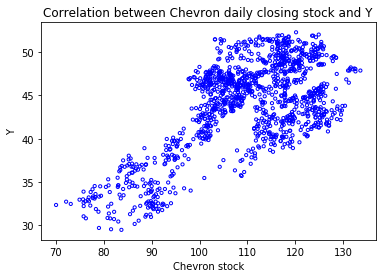

In [8]:
#3 largest absolute correlation values
m=Ecorr_abs.sort_values(ascending=False)
largest=pd.DataFrame(m.iloc[1:4])
print('The 3 largest values of correlation with Y are:')

#scatterplots of features with highest correlation
plt.scatter(stock['Chevron'],stock['Y'], s=10,facecolors='none', edgecolors='blue')
plt.title('Correlation between Chevron daily closing stock and Y')
plt.xlabel('Chevron stock')
plt.ylabel('Y')

largest

Text(0, 0.5, 'Y')

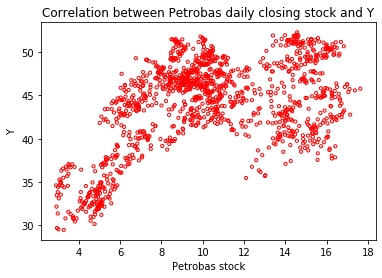

In [9]:
plt.scatter(stock['Petrobas'],stock['Y'], s=10,facecolors='none', edgecolors='red')
plt.title('Correlation between Petrobas daily closing stock and Y')
plt.xlabel('Petrobas stock')
plt.ylabel('Y')

Text(0, 0.5, 'Y')

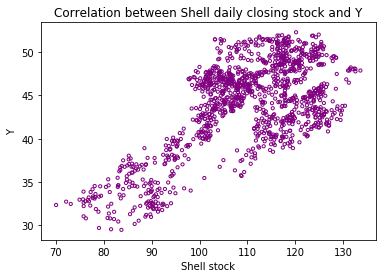

In [10]:
plt.scatter(stock['Shell'],stock['Y'], s=10,facecolors='none', edgecolors='purple')
plt.title('Correlation between Shell daily closing stock and Y')
plt.xlabel('Shell stock')
plt.ylabel('Y')

From the correlation plots, we see that our top 3 features correlate well with Y but still don't have perfect correlation. The plots show much variation. This means that Y prices probably only partially depends on the prices of these 3 features. Shell correlates best with Y, Chevron next, and then Petrobas.

# Question 2: Kernel Ridge Regression (KRR) with radial kernel

In [11]:
#importing packages

from sklearn.kernel_ridge import KernelRidge
from sklearn.metrics import mean_squared_error
from sklearn.metrics.pairwise import rbf_kernel
from numpy import linalg as LA

In [12]:
#reset index of train set
#X_train=X_train.reset_index()
print('shape of Xtrain, Xtest, ytrain, ytest')
X_train.shape, X_test.shape, y_train.shape, y_test.shape

shape of Xtrain, Xtest, ytrain, ytest


((1006, 11), (252, 11), (1006,), (252,))

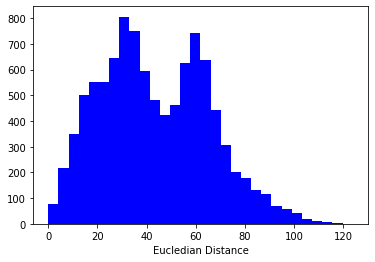

The 10% quantile of Dij is: 15.16 

The value of gamma is: 0.07


In [13]:
#computing the norm of eigenvalues
np.random.seed(1)
list1=np.random.choice(len(X_train),100, replace=False)
list2=np.random.choice(len(X_train),100, replace=False)
Dij=[]
for i in list1:
    for j in list2:
        Dij.append(LA.norm((X_train.iloc[i])-(X_train.iloc[j])))
plt.hist(Dij, bins=30, color='blue')
plt.xlabel('Eucledian Distance')
plt.show()

#10% quantile of Dij
Dij=pd.DataFrame(Dij)
q=Dij.quantile(0.1)
print('The 10% quantile of Dij is:', round((q[0]),2),'\n')

#value of gamma
gamma1=1/q
print('The value of gamma is:',round((gamma1[0]),2))

In [14]:
from scipy.spatial import distance_matrix
G = distance_matrix(X_train,X_train)
G = pd.DataFrame(np.exp(-gamma1[0]*(G**2)))
print('Gramian Matrix',G.shape)
G.head()

Gramian Matrix (1006, 1006)


,0,1,2,3,4,5,6,7,8,9,...,996,997,998,999,1000,1001,1002,1003,1004,1005
0,1.000000e+00,8.955700e-55,1.251045e-111,2.687791e-65,1.349986e-103,4.510886e-118,1.306299e-102,5.397857e-102,1.285619e-101,6.714154e-191,...,1.395469e-39,1.933323e-123,7.718856e-113,6.768081e-81,3.896103e-51,1.147249e-61,4.930513e-73,7.648736e-54,8.856735e-149,1.325151e-29
1,8.955700e-55,1.000000e+00,4.970745e-201,7.226658e-128,4.174239e-167,1.606840e-166,1.131792e-157,1.010460e-177,3.445016e-154,0.000000e+00,...,1.323882e-85,6.697090e-121,1.210483e-150,2.483145e-10,9.356514e-38,4.952660e-117,3.601067e-34,5.900095e-01,1.822020e-255,4.003251e-05
2,1.251045e-111,4.970745e-201,1.000000e+00,4.471455e-26,2.764981e-04,3.053353e-27,1.043107e-11,4.706059e-06,3.701302e-07,9.654142e-33,...,1.765950e-37,2.658194e-43,6.096427e-17,8.386403e-191,3.573060e-94,2.117241e-30,4.179100e-135,3.427391e-203,4.949840e-06,3.363463e-161
3,2.687791e-65,7.226658e-128,4.471455e-26,1.000000e+00,6.807147e-18,1.812880e-10,6.989911e-11,1.687433e-10,5.294332e-20,1.839119e-106,...,4.779627e-06,9.005209e-49,2.822797e-39,1.338636e-116,2.322191e-38,4.666193e-01,3.374446e-61,8.249074e-132,7.752341e-48,1.521772e-95
4,1.349986e-103,4.174239e-167,2.764981e-04,6.807147e-18,1.000000e+00,2.007353e-15,3.052857e-04,1.116032e-03,1.639701e-01,1.902005e-53,...,3.126352e-26,4.784429e-26,2.172577e-10,3.579717e-152,1.668897e-68,2.697341e-20,1.640381e-101,6.123597e-170,3.642478e-15,3.262814e-134


In [15]:
#compute eigen values for the Gramian
from numpy import linalg as LA
eigval, eigvec=LA.eig(G)
print('eigen values',eigval.shape,'\n')

eigen values (1006,) 



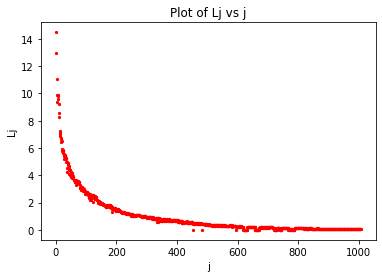

In [16]:
#plot of eigen values, Lj vs j
Lj=eigval.tolist()
j=list(range(1,len(Lj)+1))
plt.scatter(j,Lj,c='red',s=5)
plt.title('Plot of Lj vs j')
plt.xlabel('j')
plt.ylabel('Lj')
print('\n')

Value of lambda: 0.311


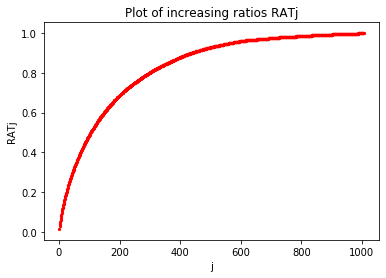

In [17]:
##plot of increasing ratios RATj
x=pd.DataFrame(Lj).cumsum()
RATj=x/sum(Lj)
plt.scatter(j,RATj,c='red',s=5)
plt.title('Plot of increasing ratios RATj')
plt.ylabel('RATj')
plt.xlabel('j')

n=RATj[RATj>0.95]
n=n.dropna()
u=n.index.tolist()
λ=round((Lj[u[0]]),4)
print('Value of lambda:',λ)

In [18]:
#computing the matrix M = G + λ Id  

#computing λ Id  
Id=np.identity(len(G))
λId=λ*Id

#computing M
M = G + λId
print('Matrix M',M.shape)
M.head()

Matrix M (1006, 1006)


,0,1,2,3,4,5,6,7,8,9,...,996,997,998,999,1000,1001,1002,1003,1004,1005
0,1.311000e+00,8.955700e-55,1.251045e-111,2.687791e-65,1.349986e-103,4.510886e-118,1.306299e-102,5.397857e-102,1.285619e-101,6.714154e-191,...,1.395469e-39,1.933323e-123,7.718856e-113,6.768081e-81,3.896103e-51,1.147249e-61,4.930513e-73,7.648736e-54,8.856735e-149,1.325151e-29
1,8.955700e-55,1.311000e+00,4.970745e-201,7.226658e-128,4.174239e-167,1.606840e-166,1.131792e-157,1.010460e-177,3.445016e-154,0.000000e+00,...,1.323882e-85,6.697090e-121,1.210483e-150,2.483145e-10,9.356514e-38,4.952660e-117,3.601067e-34,5.900095e-01,1.822020e-255,4.003251e-05
2,1.251045e-111,4.970745e-201,1.311000e+00,4.471455e-26,2.764981e-04,3.053353e-27,1.043107e-11,4.706059e-06,3.701302e-07,9.654142e-33,...,1.765950e-37,2.658194e-43,6.096427e-17,8.386403e-191,3.573060e-94,2.117241e-30,4.179100e-135,3.427391e-203,4.949840e-06,3.363463e-161
3,2.687791e-65,7.226658e-128,4.471455e-26,1.311000e+00,6.807147e-18,1.812880e-10,6.989911e-11,1.687433e-10,5.294332e-20,1.839119e-106,...,4.779627e-06,9.005209e-49,2.822797e-39,1.338636e-116,2.322191e-38,4.666193e-01,3.374446e-61,8.249074e-132,7.752341e-48,1.521772e-95
4,1.349986e-103,4.174239e-167,2.764981e-04,6.807147e-18,1.311000e+00,2.007353e-15,3.052857e-04,1.116032e-03,1.639701e-01,1.902005e-53,...,3.126352e-26,4.784429e-26,2.172577e-10,3.579717e-152,1.668897e-68,2.697341e-20,1.640381e-101,6.123597e-170,3.642478e-15,3.262814e-134


In [19]:
#computing M-inverse
M_inv=pd.DataFrame(LA.inv(M))

In [20]:
#resetting y_train axis
y_train=pd.DataFrame(y_train)
y_tr=y_train.reset_index()
y_tr=y_tr['Y']

In [21]:
#resetting y_test axis
y_test=pd.DataFrame(y_test)
y_te=y_test.reset_index()
y_te=y_te['Y']

In [22]:
#computing the line vector A
A=M_inv@y_tr #the @ operator is for matrix multiplication
A=pd.DataFrame(A)

In [23]:
#computing V(x) and pred(x)
def pred(x):
    return A.T@V_x.T
pred_x=[]
for i in range(len(X_train)):
    x=pd.DataFrame(X_train.iloc[i].tolist()).T
    V_x = distance_matrix(x,X_train)
    V_x = pd.DataFrame(np.exp(-gamma1[0]*(V_x**2)))
    pred_x.append(pred(x))
pred_x_tr=pd.DataFrame(pred_x)
print('Y predictions for train',pred_x_tr.shape)
round((pred_x_tr),2).head(15)

Y predictions for train (1006, 1)


,0
0,47.20
1,43.17
2,44.36
3,47.95
4,46.22
5,46.80
6,43.98
7,43.08
8,44.68
9,30.35


In [24]:
#computing RMSEtrain
MSEtrain=mean_squared_error(pred_x_tr, y_train)
RMSEtrain=round((np.sqrt(MSEtrain)),3)
print('RMSE of train:',RMSEtrain)

RMSE of train: 3.705


# computations for test, calculating RMSEtest

In [25]:
#computing V(x) and pred(x)
pred_x=[]
for i in range(len(X_test)):
    x=pd.DataFrame(X_test.iloc[i].tolist()).T
    V_x = distance_matrix(x,X_train)
    V_x = pd.DataFrame(np.exp(-gamma1[0]*(V_x**2)))
    pred_x.append(pred(x))
pred_x_te=pd.DataFrame(pred_x)
print('Y predictions for test',pred_x_te.shape)
round((pred_x_te),2).head(15)

Y predictions for test (252, 1)


,0
0,33.92
1,40.40
2,29.44
3,44.27
4,9.03
5,33.73
6,39.97
7,38.22
8,30.88
9,47.01


In [26]:
#computing RMSEtest
MSEtest=mean_squared_error(pred_x_te, y_test)
RMSEtest=round((np.sqrt(MSEtest)),3)
print('RMSE of test:',RMSEtest)

RMSE of test: 11.275


In [27]:
#comparing RMSE of train and test
avy_tr=abs(y_train).mean()
avy_te=abs(y_test).mean()
rat_tr=round((RMSEtrain/avy_tr[0]),4) 
rat_te=round((RMSEtest/avy_te[0]),4)

print('RMSE ratio of train:',rat_tr)
print('RMSE ratio of test:',rat_te)

RMSE ratio of train: 0.084
RMSE ratio of test: 0.2594


The lambda value is taken at a 95% explained variation of the train data. The RMSE ratio for the training set is quite small. This means for a gamma of 0.07, and lambda of 0.311, our model built does a good job in predicting our target variable results with low average error, with respect to the average of the training set. The RMSE ratio for the test is larger than the train ratio, but still has a decent average error. Although it is ok for our train to have better predictions than out test, we want to produce as little average error as possible for both of them, with stable performance when going from train to test, in order gain more confidence about our predictions for any new cases. Hence, a tuning for the best pair of parameters needs to be performed.

# Question 3: Improving the results through step by step tuning

In [28]:
#optimizing RMSE 

#tuning with gamma values
gamma=[0.00001,0.00002,0.00005,0.0001,0.0005]
rat_tr=[]
rat_te=[]
print('gamma values:',gamma)

for i in gamma:
    G = distance_matrix(X_train,X_train)
    G = pd.DataFrame(np.exp(-i*(G**2)))
    eigval, eigvec=LA.eig(G)
    Id=np.identity(len(G))
    λId=λ*Id
    M=G+λId
    M_inv=pd.DataFrame(LA.inv(M))
    A=M_inv@y_tr 
    A=pd.DataFrame(A)
    
    predtr_x=[]
    for j in range(len(X_train)):
        x=pd.DataFrame(X_train.iloc[j].tolist()).T
        V_x = distance_matrix(x,X_train)
        V_x = pd.DataFrame(np.exp(-i*(V_x**2)))
        predtr_x.append(pred(x))
    pred_x_tr=pd.DataFrame(predtr_x)
    
    predte_x=[]
    for k in range(len(X_test)):
        x=pd.DataFrame(X_test.iloc[k].tolist()).T
        V_x = distance_matrix(x,X_train)
        V_x = pd.DataFrame(np.exp(-i*(V_x**2)))
        predte_x.append(pred(x))
    pred_x_te=pd.DataFrame(predte_x)
    
    MSEtrain=mean_squared_error(pred_x_tr, y_train)
    RMSEtrain=round((np.sqrt(MSEtrain)),3)
    rat_tr.append(round((RMSEtrain/avy_tr[0]),3))
    
    MSEtest=mean_squared_error(pred_x_te, y_test)
    RMSEtest=round((np.sqrt(MSEtest)),3)
    rat_te.append(round((RMSEtest/avy_te[0]),3))
    
print('\n','Ratios of RMSE for train:',rat_tr)
print('\n','Ratios of RMSE for test:',rat_te)

gamma values: [1e-05, 2e-05, 5e-05, 0.0001, 0.0005]

 Ratios of RMSE for train: [0.066, 0.061, 0.056, 0.05, 0.036]

 Ratios of RMSE for test: [0.067, 0.062, 0.057, 0.052, 0.039]


In [29]:
#tuning with lambda values
λs=[1.5,2,2.5,3,3.5]
rat_tr=[]
rat_te=[]
print('lambda values:',λs)

for i in λs:
    G = distance_matrix(X_train,X_train)
    G = pd.DataFrame(np.exp(-gamma1[0]*(G**2)))
    eigval, eigvec=LA.eig(G)
    Id=np.identity(len(G))
    λId=i*Id
    M = G + λId
    M_inv=pd.DataFrame(LA.inv(M))
    A=M_inv@y_tr 
    A=pd.DataFrame(A)
    
    predtr_x=[]
    for j in range(len(X_train)):
        x=pd.DataFrame(X_train.iloc[j].tolist()).T
        V_x = distance_matrix(x,X_train)
        V_x = pd.DataFrame(np.exp(-gamma1[0]*(V_x**2)))
        predtr_x.append(pred(x))
    pred_x_tr=pd.DataFrame(predtr_x)
    
    predte_x=[]
    for k in range(len(X_test)):
        x=pd.DataFrame(X_test.iloc[k].tolist()).T
        V_x = distance_matrix(x,X_train)
        V_x = pd.DataFrame(np.exp(-gamma1[0]*(V_x**2)))
        predte_x.append(pred(x))
    pred_x_te=pd.DataFrame(predte_x)
    
    MSEtrain=mean_squared_error(pred_x_tr, y_train)
    RMSEtrain=round((np.sqrt(MSEtrain)),3)
    rat_tr.append(round((RMSEtrain/avy_tr[0]),3))
    
    MSEtest=mean_squared_error(pred_x_te, y_test)
    RMSEtest=round((np.sqrt(MSEtest)),3)
    rat_te.append(round((RMSEtest/avy_te[0]),3))
    
print('\n','Ratio of RMSE for train:',rat_tr)
print('\n','Ratio of RMSE for test:',rat_te)

lambda values: [1.5, 2, 2.5, 3, 3.5]

 Ratio of RMSE for train: [0.255, 0.304, 0.346, 0.382, 0.414]

 Ratio of RMSE for test: [0.387, 0.426, 0.461, 0.491, 0.517]


In [30]:
#tuning with gamma and lambda values 

gamma=[0.00001,0.00002,0.00005,0.0001,0.0005]
λs=[1.5,2,2.5,3,3.5]
rat_tr=[]
rat_te=[]
print('gamma values:',gamma)
print('lambda values:',λs)

for i in gamma:
    G = distance_matrix(X_train,X_train)
    G = pd.DataFrame(np.exp(-i*(G**2)))
    eigval, eigvec=LA.eig(G)
    for j in λs:
        Id=np.identity(len(G))
        λId=j*Id
        M = G + λId
        M_inv=pd.DataFrame(LA.inv(M))
        A=M_inv@y_tr 
        A=pd.DataFrame(A)
        
        predtr_x=[]
        for k in range(len(X_train)):
            x=pd.DataFrame(X_train.iloc[k].tolist()).T
            V_x = distance_matrix(x,X_train)
            V_x = pd.DataFrame(np.exp(-i*(V_x**2)))
            predtr_x.append(pred(x))
        pred_x_tr=pd.DataFrame(predtr_x)
        
        predte_x=[]
        for g in range(len(X_test)):
            x=pd.DataFrame(X_test.iloc[g].tolist()).T
            V_x = distance_matrix(x,X_train)
            V_x = pd.DataFrame(np.exp(-i*(V_x**2)))
            predte_x.append(pred(x))
        pred_x_te=pd.DataFrame(predte_x)
        
        MSEtrain=mean_squared_error(pred_x_tr, y_train)
        RMSEtrain=round((np.sqrt(MSEtrain)),3)
        rat_tr.append(round((RMSEtrain/avy_tr[0]),4))
        
        MSEtest=mean_squared_error(pred_x_te, y_test)
        RMSEtest=round((np.sqrt(MSEtest)),3)
        rat_te.append(round((RMSEtest/avy_te[0]),4))
rat_tr=pd.DataFrame(rat_tr)
rat_te=pd.DataFrame(rat_te)        
print('\n','Ratios of RMSE for train:','\n',round((rat_tr),3))
print('\n','Ratios of RMSE for test:','\n',round((rat_te),3))

gamma values: [1e-05, 2e-05, 5e-05, 0.0001, 0.0005]
lambda values: [1.5, 2, 2.5, 3, 3.5]

 Ratios of RMSE for train: 
         0
0   0.078
1   0.081
2   0.083
3   0.085
4   0.086
5   0.070
6   0.073
7   0.074
8   0.076
9   0.078
10  0.065
11  0.067
12  0.068
13  0.069
14  0.070
15  0.062
16  0.064
17  0.066
18  0.068
19  0.069
20  0.049
21  0.052
22  0.056
23  0.058
24  0.061

 Ratios of RMSE for test: 
         0
0   0.080
1   0.083
2   0.085
3   0.087
4   0.089
5   0.072
6   0.074
7   0.076
8   0.078
9   0.079
10  0.067
11  0.069
12  0.070
13  0.071
14  0.072
15  0.064
16  0.067
17  0.069
18  0.071
19  0.072
20  0.052
21  0.056
22  0.059
23  0.063
24  0.066


In [31]:
#identifying best choice of parameters
diff=[]
for i in range(len(rat_te)):
    diff.append(round((abs(rat_tr.iloc[i][0]-rat_te.iloc[i][0])),4))
print('Identifying best choice of parameters by smallest difference in RMSE ratio between prediction and actual')
print('\n',diff,'\n')
diff=pd.Series(diff)
print('Sorted indices for RMSE difference')
diff.argsort()

Identifying best choice of parameters by smallest difference in RMSE ratio between prediction and actual

 [0.0017, 0.0019, 0.0021, 0.0023, 0.0024, 0.0012, 0.0013, 0.0015, 0.0015, 0.0015, 0.0022, 0.0022, 0.0021, 0.002, 0.0019, 0.0029, 0.0029, 0.0031, 0.0031, 0.0031, 0.0034, 0.0036, 0.0039, 0.0042, 0.0044] 

Sorted indices for RMSE difference


0      5
1      6
2      9
3      7
4      8
5      0
6      1
7     14
8     13
9     12
10     2
11    10
12    11
13     3
14     4
15    15
16    16
17    17
18    18
19    19
20    20
21    21
22    22
23    23
24    24
dtype: int64

In [32]:
#Best pair
print('Best choice of parameters:','\n','gamma:',gamma[1],'\n','lambda:',λs[0],'\n')
print('RMSE ratio for train:',rat_tr.iloc[5][0])
print('RMSE ratio for test:',rat_te.iloc[5][0])
gamma2=gamma[1]
λ2=λs[0]

Best choice of parameters: 
 gamma: 2e-05 
 lambda: 1.5 

RMSE ratio for train: 0.0705
RMSE ratio for test: 0.0717


The RMSE ratios for train and test are lower than the previously computed values in question 2, and are more stable.

In [33]:
#identifying the 10 cases with worst accuracy
G = distance_matrix(X_train,X_train)
G = pd.DataFrame(np.exp(-gamma2*(G**2)))
eigval, eigvec=LA.eig(G)
Id=np.identity(len(G))
λId=λ2*Id
M = G + λId
M_inv=pd.DataFrame(LA.inv(M))
A=M_inv@y_tr 
A=pd.DataFrame(A)

predte_x=[]
for k in range(len(X_test)):
    x=pd.DataFrame(X_test.iloc[k].tolist()).T
    V_x = distance_matrix(x,X_train)
    V_x = pd.DataFrame(np.exp(-gamma2*(V_x**2)))
    predte_x.append(pred(x))
pred_x_te=pd.DataFrame(predte_x)
pred_x_te.columns=['Y']

y_te=pd.DataFrame(y_te)
accuracy=[]
for i in range(len(pred_x_te)):
    accuracy.append(round((abs(pred_x_te.iloc[i][0]-y_te.iloc[i][0])),3))
index_sort=(pd.Series(accuracy)).argsort()

v=index_sort[-10:]
v=v.tolist()

print('Identifying the 10 cases with worst accuracy')
cases_10=pd.concat((X_test.iloc[v[0]],X_test.iloc[v[1]],X_test.iloc[v[2]],X_test.iloc[v[3]],X_test.iloc[v[4]],
                    X_test.iloc[v[5]],X_test.iloc[v[6]],X_test.iloc[v[7]],X_test.iloc[v[8]],X_test.iloc[v[9]]),axis=1)
cases_10=pd.DataFrame(cases_10.T)
cases_10=cases_10.drop('Dummy',axis=1)
round((cases_10),2)

Identifying the 10 cases with worst accuracy


,BP,Exxon,Chevron,Shell,Schlum,TOTAL,Equinor,Petrobas,Enterp,CNOOC
11/13/2018,39.81,78.00,115.35,115.35,47.34,54.85,23.58,13.90,26.13,163.12
7/26/2017,34.84,80.37,105.12,105.12,66.99,50.39,17.87,8.63,27.60,112.92
12/24/2018,36.65,65.51,100.99,100.99,35.19,50.22,20.15,12.10,23.51,143.49
11/27/2015,34.83,81.23,90.37,90.37,77.33,49.23,15.36,4.93,25.64,107.83
12/8/2015,31.27,74.63,86.44,86.44,71.50,46.12,14.09,4.76,22.65,106.06
11/13/2015,33.38,78.10,88.68,88.68,76.14,48.05,15.00,4.57,25.83,105.37
11/10/2015,34.77,82.35,93.23,93.23,78.77,49.58,16.14,4.93,26.75,110.70
11/3/2015,37.23,86.85,98.14,98.14,81.52,50.75,17.06,5.55,28.32,116.15
12/27/2018,37.73,68.94,109.32,109.32,36.33,52.35,21.03,12.80,24.24,150.11
12/31/2018,37.92,68.19,108.79,108.79,36.08,52.18,21.17,13.01,24.59,152.45


In [34]:
#PCA on 10 worst case predictions on TEST
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
%matplotlib inline

corr_matrix=X_train.drop('Dummy',axis=1).corr()
corr_matrix
eigval_1,eigvec_1=LA.eig(corr_matrix)
scores_3=cases_10.dot(eigvec_1[:,:3])
print('PCA on 10 worst case predictions on TEST, on 3 principal components')
round((scores_3),2)

PCA on 10 worst case predictions on TEST, on 3 principal components


,0,1,2
11/13/2018,-178.84,-116.85,24.87
7/26/2017,-140.92,-124.96,36.37
12/24/2018,-159.77,-98.21,19.03
11/27/2015,-122.93,-129.04,37.60
12/8/2015,-117.99,-118.92,34.96
11/13/2015,-120.13,-125.94,36.14
11/10/2015,-126.20,-131.50,37.87
11/3/2015,-132.87,-137.71,39.01
12/27/2018,-169.63,-102.67,21.06
12/31/2018,-170.40,-102.32,19.84


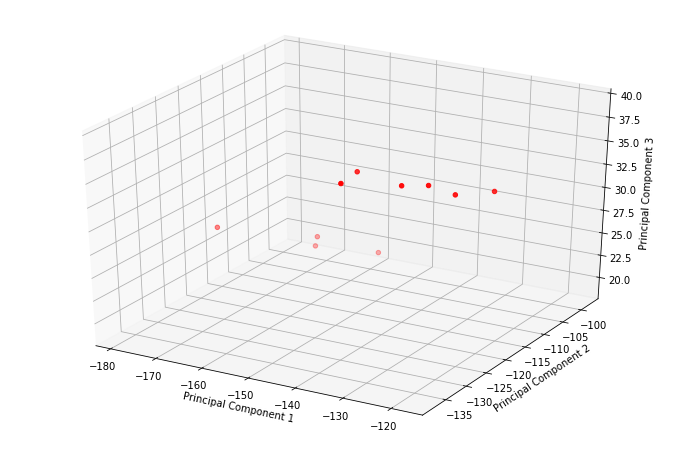

In [35]:
from mpl_toolkits import mplot3d

fig = plt.figure(figsize=(12,8))
ax = plt.axes(projection='3d')
ax.scatter(scores_3.iloc[:][0], scores_3.iloc[:][1], scores_3.iloc[:][2], zdir='z', s=20, c='red', depthshade=True)
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
print('\n')

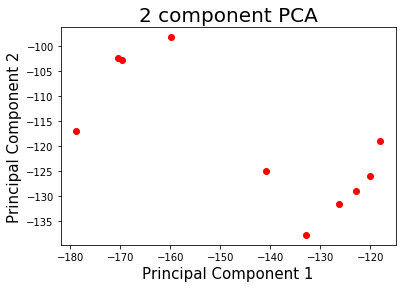

In [36]:
plt.scatter(scores_3.iloc[:][0], scores_3.iloc[:][1],c='red')
plt.xlabel('Principal Component 1', fontsize = 15)
plt.ylabel('Principal Component 2', fontsize = 15)
plt.title('2 component PCA', fontsize = 20)
print('\n')

In [37]:
u=index_sort[:10]
u=u.tolist()

cases_best10=pd.concat((X_test.iloc[u[0]],X_test.iloc[u[1]],X_test.iloc[u[2]],X_test.iloc[u[3]],X_test.iloc[u[4]],
                    X_test.iloc[u[5]],X_test.iloc[u[6]],X_test.iloc[u[7]],X_test.iloc[u[8]],X_test.iloc[u[9]]),axis=1)
cases_best10=pd.DataFrame(cases_best10.T)
cases_best10=cases_best10.drop('Dummy',axis=1)
cases_best10
scoresb_3=cases_best10.dot(eigvec_1[:,:3])
print('PCA on 10 best case predictions on TEST, on 3 principal components')
round((scoresb_3),2)

PCA on 10 best case predictions on TEST, on 3 principal components


,0,1,2
8/29/2018,-188.53,-132.88,30.00
6/5/2015,-149.67,-144.48,31.03
12/29/2017,-172.92,-131.83,38.35
2/27/2015,-152.91,-145.84,33.30
2/26/2019,-189.80,-117.69,20.98
9/12/2018,-187.22,-132.09,26.56
1/13/2015,-144.65,-140.10,32.26
12/27/2017,-173.04,-132.24,38.63
12/15/2017,-166.54,-127.39,36.19
9/22/2015,-110.98,-119.39,28.97


Blue is for best cases, Red is for worst cases


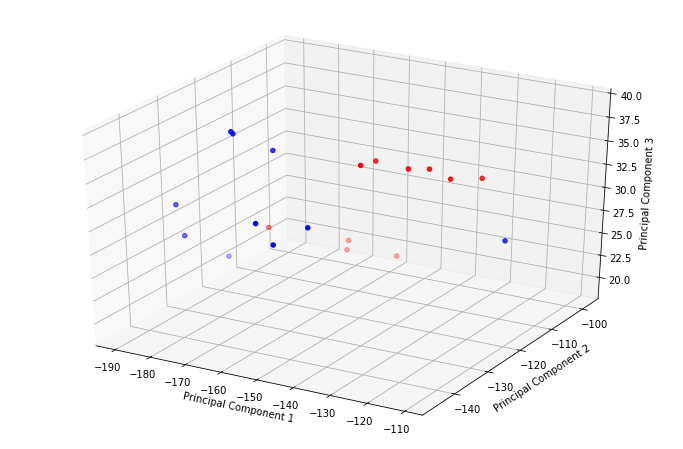

In [38]:
fig = plt.figure(figsize=(12,8))

ax = plt.axes(projection='3d')
ax.scatter(scores_3.iloc[:][0], scores_3.iloc[:][1], scores_3.iloc[:][2], zdir='z', s=20, c='red', depthshade=True)
ax.scatter(scoresb_3.iloc[:][0], scoresb_3.iloc[:][1], scoresb_3.iloc[:][2], zdir='z', s=20, c='blue', depthshade=True)
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
print('Blue is for best cases, Red is for worst cases')

Blue is for best cases, Red is for worst cases


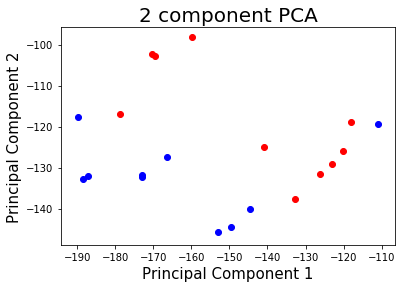

In [39]:
plt.scatter(scores_3.iloc[:][0], scores_3.iloc[:][1],c='red')
plt.scatter(scoresb_3.iloc[:][0], scoresb_3.iloc[:][1],c='blue')
plt.xlabel('Principal Component 1', fontsize = 15)
plt.ylabel('Principal Component 2', fontsize = 15)
plt.title('2 component PCA', fontsize = 20)
print('Blue is for best cases, Red is for worst cases')

In comparing the 10 best cases and 10 worst cases, we can see from the 3D plot that the best cases drift more towards the extremes, which show higher correlation in data along principal components 1, 2 and 3. The 10 worst cases however are further apart and away from the extremes, hence do not correlate well, and this shows their variability is not as strong along the 3 principal components. Looking in the 2D plots, we see more clearly how the 10 best and 10 worst are spread in the direction of the 2 principal components.

# Question 4 : Analysis of the best predicting formula pred(x)

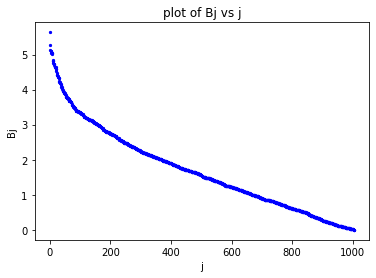

In [40]:
G = distance_matrix(X_train,X_train)
G = pd.DataFrame(np.exp(-gamma2*(G**2)))
eigval, eigvec=LA.eig(G)
Id=np.identity(len(G))
λId=λ2*Id
M = G + λId
M_inv=pd.DataFrame(LA.inv(M))
A=M_inv@y_tr 
Bj = abs(A).sort_values()[::-1]
j=list(range(len(Bj)))
plt.scatter(j,Bj,s=5,c='blue')
plt.ylabel('Bj')
plt.xlabel('j')
plt.title('plot of Bj vs j')
print('\n')

Threshold value: 0.325


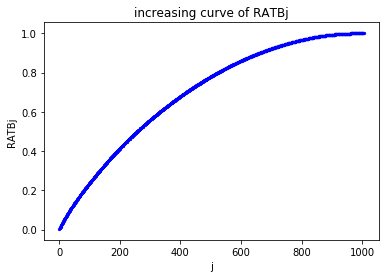

In [41]:
y=pd.DataFrame(Bj).cumsum()
RATBj=y/sum(Bj)
plt.scatter(j,RATBj,c='blue',s=5)
plt.ylabel('RATBj')
plt.xlabel('j')
plt.title('increasing curve of RATBj')


m=RATBj[RATBj>0.99]
m=m.dropna()
b=m.index.tolist()
THR=round((Bj[b[0]]),3)
print('Threshold value:', THR)

In [42]:
AA=[]
for i in range(len(A)):
    if abs(A[i])>THR:
        AA.append(round((A[i]),3))
    else:
        AA.append(0)
AA=pd.Series(AA)

def PRED(x):
    return AA.T@V_x.T
predtr_x=[]
for k in range(len(X_train)):
    x=pd.DataFrame(X_train.iloc[k].tolist()).T
    V_x = distance_matrix(x,X_train)
    V_x = pd.DataFrame(np.exp(-gamma2*(V_x**2)))
    predtr_x.append(PRED(x))
pred_x_tr=pd.DataFrame(predtr_x)

predte_x=[]
for g in range(len(X_test)):
    x=pd.DataFrame(X_test.iloc[g].tolist()).T
    V_x = distance_matrix(x,X_train)
    V_x = pd.DataFrame(np.exp(-gamma2*(V_x**2)))
    predte_x.append(PRED(x))
pred_x_te=pd.DataFrame(predte_x)

MSEtrain=mean_squared_error(pred_x_tr, y_train)
RMSEtrain=round((np.sqrt(MSEtrain)),3)
rat_tr=(round((RMSEtrain/avy_tr[0]),3))

MSEtest=mean_squared_error(pred_x_te, y_test)
RMSEtest=round((np.sqrt(MSEtest)),3)
rat_te=(round((RMSEtest/avy_te[0]),3))
    
print('\n','Ratio of RMSE for train:',rat_tr)
print('\n','Ratio of RMSE for test:',rat_te)


 Ratio of RMSE for train: 0.091

 Ratio of RMSE for test: 0.095


AA here aims to shorten the equation for the pred(x) by keeping only Ai values that pass the 99% threshold. The RMSE ratios produced using a 99% explained variation are slightly higher than in question 3. Hence the best predicting formula utilizes A instead of AA, where we keep all the values got using a 95% threshold for explained variation, producing the full equation, as opposed to dropping Ai values that don't meet the 99% threshold and using the shorter equation.

# Question 5 (optional): Implement KRR using a pre existing function

In [43]:
#selecting the kernel
KRR= KernelRidge(kernel ='rbf',alpha=1, gamma=gamma2)
KRR.fit(X_train, y_train)
predict_tr=KRR.predict(X_train)
predict_te=KRR.predict(X_test)

MSEtrain=mean_squared_error(predict_tr, y_train)
RMSEtrain=round((np.sqrt(MSEtrain)),3)
RAT_tr=(round((RMSEtrain/avy_tr[0]),3))

MSEtest=mean_squared_error(predict_te, y_test)
RMSEtest=round((np.sqrt(MSEtest)),3)
RAT_te=(round((RMSEtest/avy_te[0]),3))
    
print('\n','Ratio of RMSE for train:',RAT_tr)
print('\n','Ratio of RMSE for test:',RAT_te)


 Ratio of RMSE for train: 0.068

 Ratio of RMSE for test: 0.069


The pre-existing inbuilt KRR function produces lower average error than our by-hand technique. This is probably because it has better tuning parameters. If need be, maybe further tuning on other parameters in our calculations could yield better results.